In [326]:
from FC.FC_save_load_global_hook_dict import load_csv_to_dict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import numpy as np

In [327]:
horizontal_filepath = '/home/mo/Thesis/src/robot_control/robot_control/data/global_scan_dicts/global_hook_dict_horizontal.csv'
vertical_filepath = '/home/mo/Thesis/src/robot_control/robot_control/data/global_scan_dicts/global_hook_dict_vertical.csv'

In [328]:
horizontal_dict = load_csv_to_dict(filename=horizontal_filepath)
vertical_dict = load_csv_to_dict(filename=vertical_filepath)

In [329]:
print(len(horizontal_dict))
print(len(vertical_dict))

23
23


In [330]:
def get_plot_values(dict1):
    """
    Holt die Werte für XYZ aus Dict und liefert Listen mit den Werten zurück, die dan geplottet werden können
    """
    xyz_hook_in_workframe_list = []
    xyz_tip_in_workframe_list = []
    xyz_lowpoint_in_workframe_list = []

    for idx, key in enumerate(dict1):
        xyz_hook_in_workframe_list.append(dict1[key]['xyz_hook_in_workframe'])
        xyz_tip_in_workframe_list.append(dict1[key]['xyz_tip_in_workframe'])
        xyz_lowpoint_in_workframe_list.append(dict1[key]['xyz_lowpoint_in_workframe'])

    return xyz_hook_in_workframe_list, xyz_tip_in_workframe_list, xyz_lowpoint_in_workframe_list

In [331]:
def calc_axiswise_differences(list1, list2):
    """
    Berechnet die absoluten Distanzen zwischen zwei 3D-Punktlisten achsenweise.
    
    Rückgabe:
        - dx: Liste der |x1 - x2| Werte
        - dy: Liste der |y1 - y2| Werte
        - dz: Liste der |z1 - z2| Werte
    """
    arr1 = np.array(list1)
    arr2 = np.array(list2)
    
    diffs = arr1 - arr2  # shape: (n, 3)
    
    dx = diffs[:, 0].tolist()
    dy = diffs[:, 1].tolist()
    dz = diffs[:, 2].tolist()
    
    return dx, dy, dz

In [332]:
def calc_euclidean_distance(list1, list2):
    """
    Berechnet die euklidische Distanz der Punkte
    """
    arr1 = np.array(list1)
    arr2 = np.array(list2)
    diffs = np.linalg.norm(arr1 - arr2, axis=1)
    return diffs.tolist()

In [333]:
xyz_hook1_in_workframe, xyz_tip1_in_workframe, xyz_lowpoint1_in_workframe = get_plot_values(dict1 = horizontal_dict)
xyz_hook2_in_workframe, xyz_tip2_in_workframe, xyz_lowpoint2_in_workframe = get_plot_values(dict1 = vertical_dict)
tip_euclidean_diff = calc_euclidean_distance(xyz_tip1_in_workframe, xyz_tip2_in_workframe)
dx, dy, dz = calc_axiswise_differences(xyz_tip1_in_workframe, xyz_tip2_in_workframe)

In [334]:
def plot_3d_point(points1, points2, diff, dx, dy, dz, plottitle='Gesamtvergleich der Triangulationsmethoden'):
    """
    Zeichnet 3D-Vergleich der Punkte und rechts daneben zwei 2D-Plots:
    - oben: Gesamtdistanz
    - unten: Achsenweise Differenz (dx, dy, dz)
    """
    # In x, y, z aufteilen
    x_vals_1 = [p[0] for p in points1]
    y_vals_1 = [-p[1] for p in points1]
    z_vals_1 = [p[2] for p in points1]

    x_vals_2 = [p[0] for p in points2]
    y_vals_2 = [-p[1] for p in points2]
    z_vals_2 = [p[2] for p in points2]

    indices = list(range(len(diff)))

    fig = plt.figure(figsize=(18, 8))
    # fig.suptitle("Gesamtvergleich der Triangulationsergebnisse", fontsize=16, fontweight='bold')
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])
    
    ##### 3D-Plot links (beide Zeilen der linken Spalte)
    ax3d = fig.add_subplot(gs[:, 0], projection='3d')
    ax3d.scatter(x_vals_1, z_vals_1, y_vals_1, color='blue', s=60, label='horizontal')
    ax3d.scatter(x_vals_2, z_vals_2, y_vals_2, color='red', s=60, label='vertical')
    # Punkte beschriften mit Index
    for i, (x1, y1, z1) in enumerate(zip(x_vals_1, y_vals_1, z_vals_1)):
        ax3d.text(x1, z1, y1, f'{i+1}', color='black', fontsize=8)

    for i, (x2, y2, z2) in enumerate(zip(x_vals_2, y_vals_2, z_vals_2)):
        ax3d.text(x2, z2, y2, f'{i+1}', color='black', fontsize=8)
    ax3d.set_xlabel("X")
    ax3d.set_ylabel("Z")
    ax3d.set_zlabel("Y")
    ax3d.set_title("Vergleich Triangulationsverfahren Hakenspitze")
    ax3d.set_xlim([0, 1000])
    ax3d.set_ylim([200, 380])
    ax3d.set_zlim([0, 600])
    ax3d.legend()

    ##### 2D-Plot oben rechts (Gesamtdistanz)
    ax2d_1 = fig.add_subplot(gs[0, 1])
    ax2d_1.plot(indices, diff, label='euclidean distance', marker='o', color='green')
    ax2d_1.set_xlabel("Instanz")
    ax2d_1.set_ylabel("Distanz (Einheit)")
    ax2d_1.set_title("Euklidsche Distanz")
    ax2d_1.grid(True)
    ax2d_1.legend()

    ##### 2D-Plot unten rechts (dx, dy, dz)
    ax2d_2 = fig.add_subplot(gs[1, 1])
    ax2d_2.plot(indices, dx, label='dx', marker='o')
    ax2d_2.plot(indices, dy, label='dy', marker='s')
    ax2d_2.plot(indices, dz, label='dz', marker='^')
    ax2d_2.set_xlabel("Instanz")
    ax2d_2.set_ylabel("Abweichung")
    ax2d_2.set_title("Achsenweise Abweichung (horizontal - vertikal)")
    ax2d_2.grid(True)
    ax2d_2.legend()

    fig.suptitle(plottitle, fontsize=16, fontweight='bold', x=0.6)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

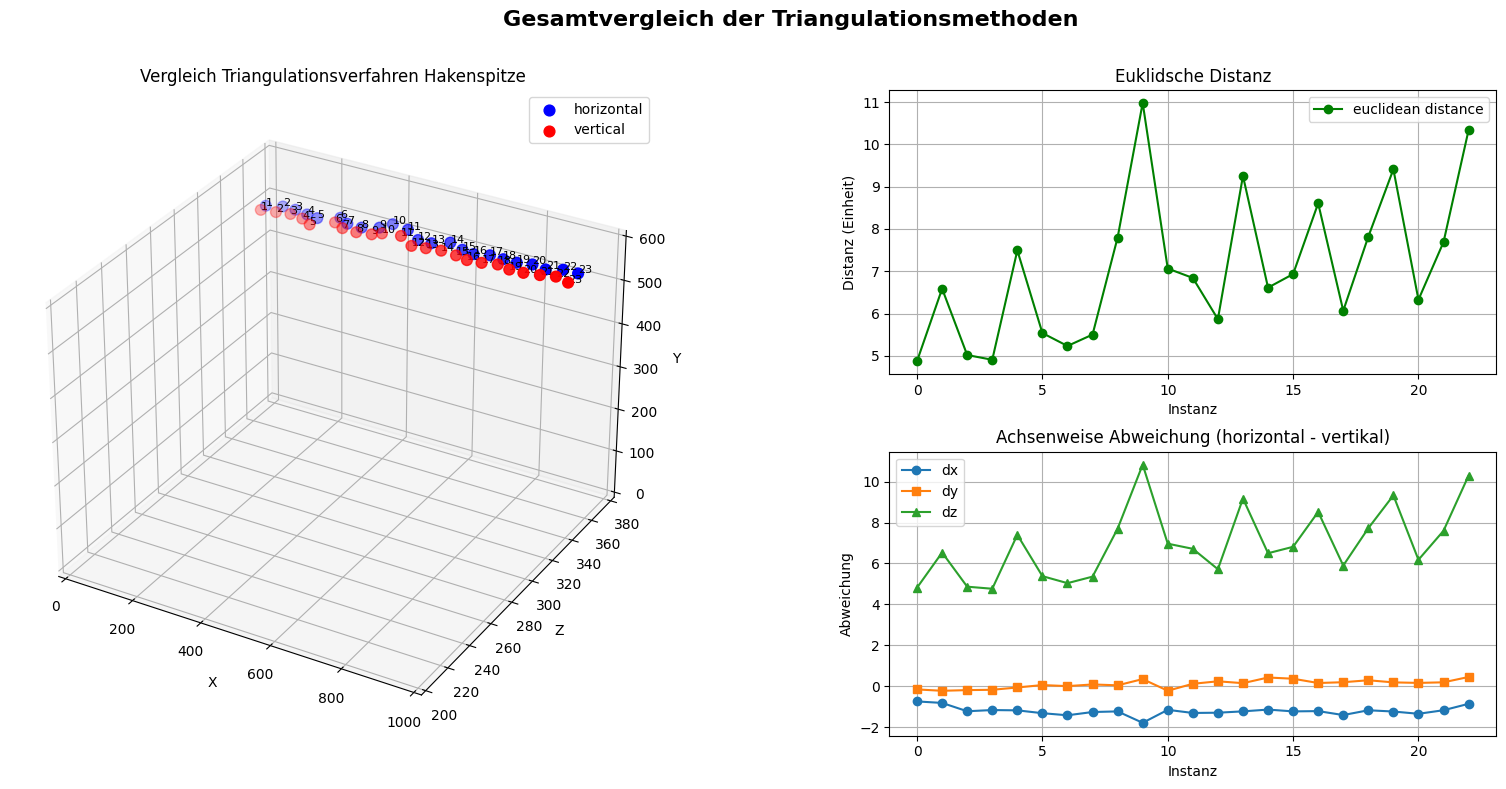

In [335]:
plot_3d_point(xyz_tip1_in_workframe, xyz_tip2_in_workframe, tip_euclidean_diff, dx, dy, dz)